 <img src="OC.png" width="50" height="50" align="left">    

***

<center> <font size="6"> <span style='color:Blue'> P3: Concevez une application au service de la santé publique </span></font> </center>  

***

**Problématique**  
L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation.
<img src="SPF.png">
**Mission**  
Nettoyer et analyser le jeu de données **Open Food Facts** pour proposer une application au service de la santé publique.  
  
**Idée d'application**  
Le reflux gastroœsophagien : Calcul d'un **score_RGO** par produit.
Nous avons tous ressenti au moins une fois dans notre vie une remontée de liquide acide de l'estomac dans l’œsophage et parfois dans la bouche surtout après un repas copieux = c’est un reflux gastro-œsophagien (RGO).  
Au moins 20 % des adultes ont des symptômes occasionnels de reflux gastro-œsophagien (remontées acides, pyrosis). 10 % ont des symptômes de RGO chaque jour. Source: https://www.ameli.fr/assure/sante/themes/rgo-adulte/definition-symptomes-causes

 <font size="4"> <span style="font-size: 1.5em" > **Partie 1: Nettoyage de données** </span> </font>

Le jeu de données est un fichier **.csv**  

**Téléchargeable sur:** https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip  
**Source:** https://world.openfoodfacts.org/   

# Importation des données et librairies Python

In [1]:
#------------------------------------------
# projet : données de Open Food Facts
# Auteur : Rim BAHROUN
# Date: Novembre 2022
# OpenClassrooms
#-------------------------------------------
# importation des librairies Python pour DS
#-------------------------------------------
import numpy as np
import pandas as pd
import csv
import scipy.stats as st
import missingno as msno #missing data visualizations
from sklearn import preprocessing
from sklearn.impute import KNNImputer
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#pour afficher 165 colonnes ou lignes minimum
pd.set_option('display.max_column', 165) 
pd.set_option('display.max_row', 165) 

In [3]:
# importation des données
data_Food = pd.read_csv('openfoodfacts.csv', delimiter='\t', low_memory=False)

In [4]:
data_Food.sample(4)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
91958,0076606313851,http://world-fr.openfoodfacts.org/produit/0076...,usda-ndb-import,1489059748,2017-03-09T11:42:28Z,1489059749,2017-03-09T11:42:29Z,Smoked Oysters,NaN,NaN,NaN,NaN,Haddon House,haddon-house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Ingredients: smoked oysters, sunflower oil, salt.",NaN,NaN,NaN,NaN,NaN,47 g (0.33 cup),NaN,0.0,[ ingredients -> en:ingredients ] [ smoked-...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,c,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,845.0,NaN,10.64,4.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.021,8.51,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,17.02,NaN,NaN,NaN,0.86360,0.340000,NaN,0.000160,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043,NaN,0.0134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN
127631,0698997809456,http://world-fr.openfoodfacts.org/produit/0698...,usda-ndb-import,1489134815,2017-03-10T08:33:35Z,1489134816,2017-03-10T08:33:36Z,Cookies,NaN,NaN,NaN,NaN,Udi's,udi-s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Dried can

# Analyse de la forme des données 

In [5]:
data_Food.shape

(320772, 162)

In [6]:
print(f'Ce jeux de données comporte : {data_Food.shape[0]} lignes qui correspondent à des produits et {data_Food.shape[1]} colonnes qui correspondent aux caractéristiques de ce produit.')

Ce jeux de données comporte : 320772 lignes qui correspondent à des produits et 162 colonnes qui correspondent aux caractéristiques de ce produit.


In [7]:
# Types de variables 
data_Food.dtypes.value_counts()

float64    106
object      56
dtype: int64

Ce jeu de données comporete 106 variables de type réel et 56 variables de type Object. 

**Conclusion:**  
* 320772 produits alimentaires 
* 162 variables 

# Nettoyage sur les variables 

In [8]:
# Classer les varaibles dans l'ordre croissant selon le remplissage 
df = data_Food.copy()
(df.isna().sum()/df.shape[0]).sort_values()

last_modified_t                               0.000000
last_modified_datetime                        0.000000
creator                                       0.000006
created_t                                     0.000009
created_datetime                              0.000028
code                                          0.000072
url                                           0.000072
states                                        0.000143
states_tags                                   0.000143
states_fr                                     0.000143
countries_fr                                  0.000873
countries                                     0.000873
countries_tags                                0.000873
product_name                                  0.055373
brands                                        0.088574
brands_tags                                   0.088599
energy_100g                                   0.185986
proteins_100g                                 0.189699
salt_100g 

Beaucoup de variables avec plus de 90% de valeurs manquantes. 

<AxesSubplot:>

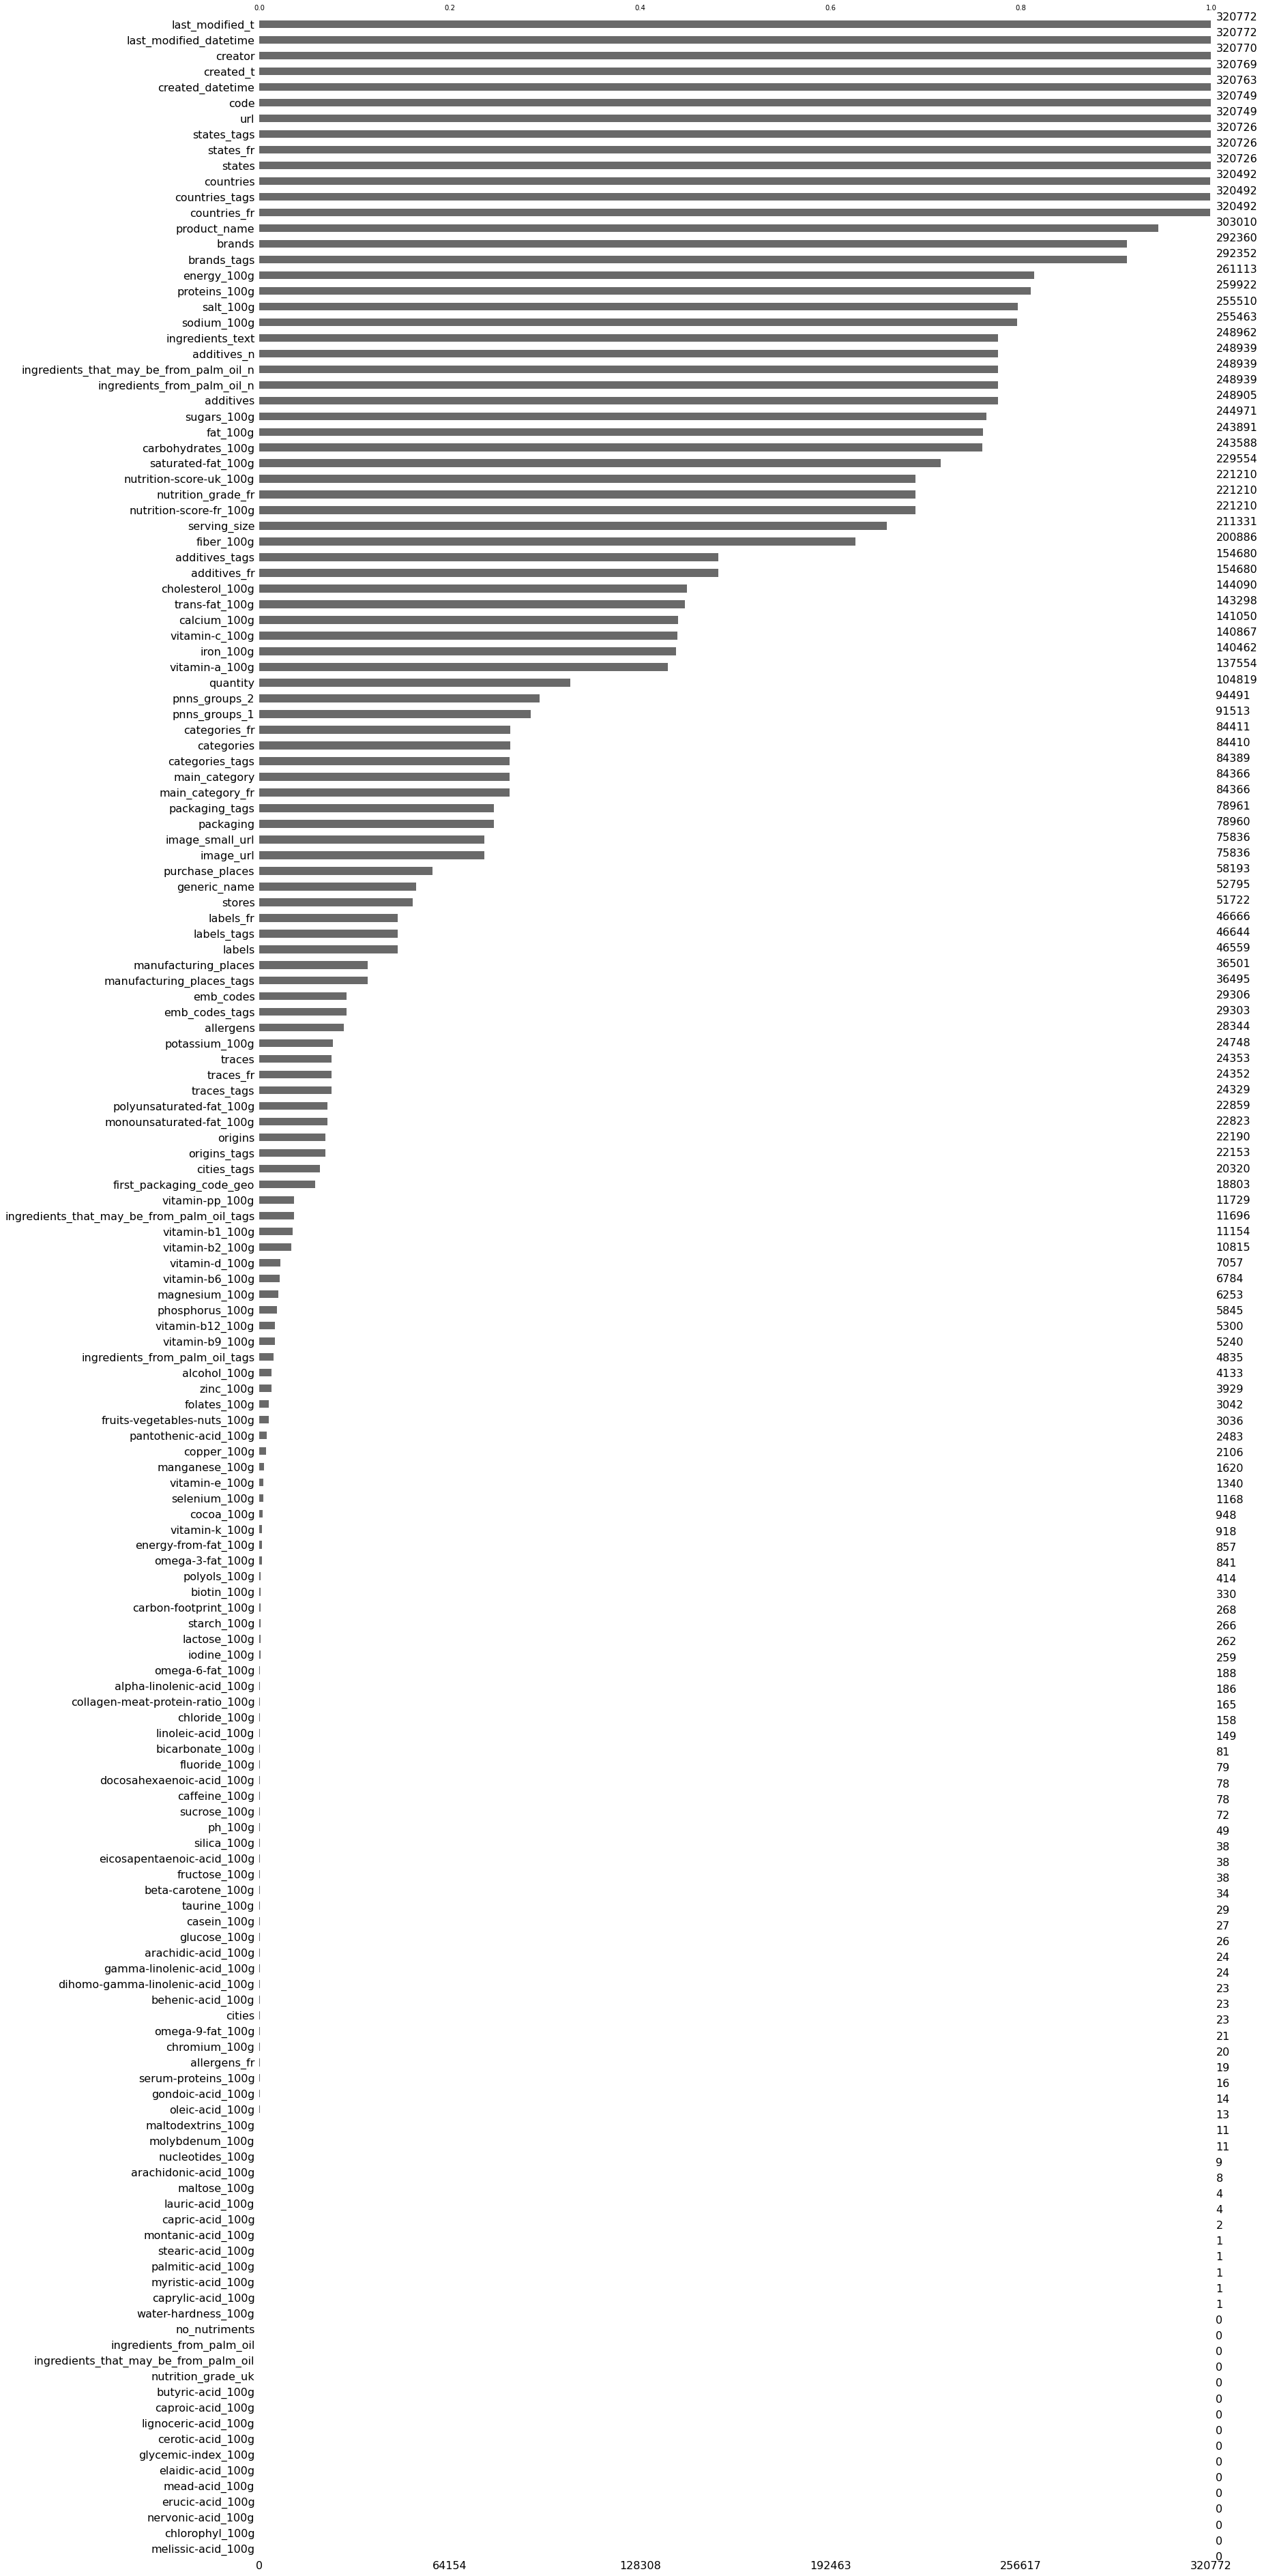

In [9]:
# nullity matrix
%matplotlib inline
msno.bar(data_Food,sort="ascending")

<AxesSubplot:>

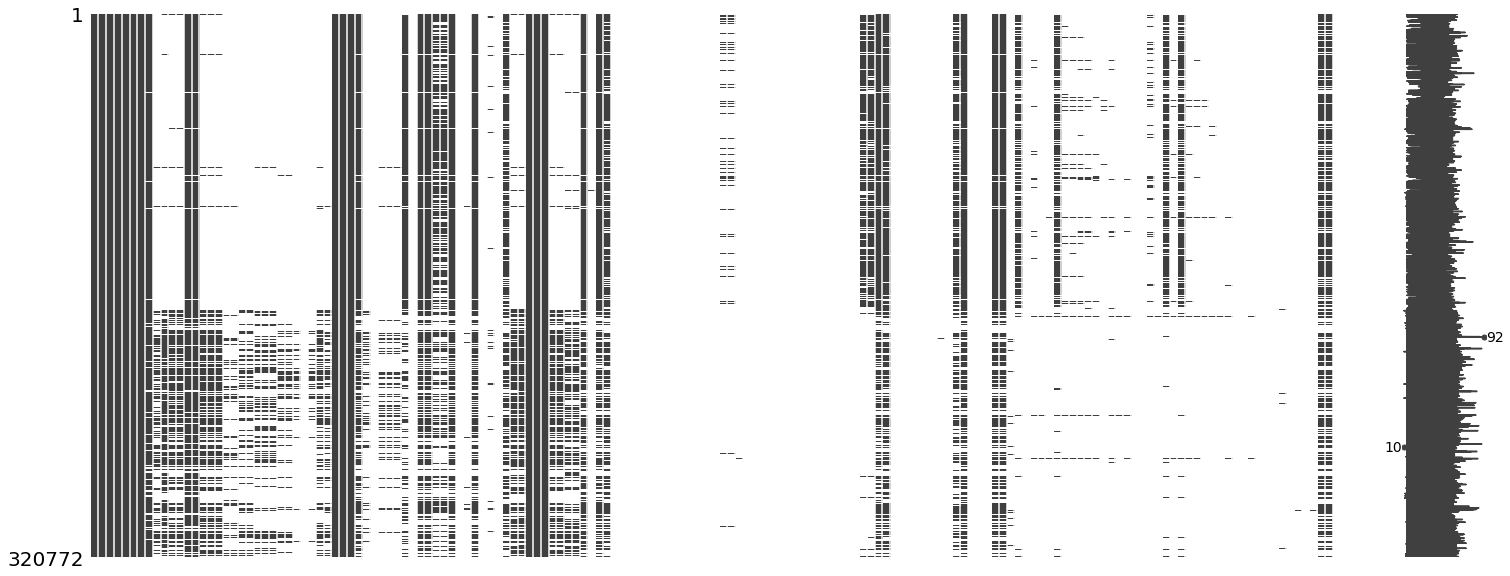

In [10]:
# nullity matrix
%matplotlib inline
msno.matrix(data_Food)

## Suppression des variables à plus de 90% de valeur manquante

In [11]:
# éliminer les variables qui sont à plus 99% de valeur manquante
data = data_Food[data_Food.columns[data_Food.isna().sum()/data_Food.shape[0] < 0.90]]
print(data.shape)

(320772, 62)


On passe de **162** variables à **62** variables.

## Suppression des variables redondantes ou non utiles

Etudions les variables : information générale. 

In [12]:
#afficher le taux de valeur manquante par variable 
df = data.iloc[:, :45]
(df.isna().sum()/df.shape[0]).sort_values()

last_modified_t                            0.000000
last_modified_datetime                     0.000000
creator                                    0.000006
created_t                                  0.000009
created_datetime                           0.000028
code                                       0.000072
url                                        0.000072
states                                     0.000143
states_fr                                  0.000143
states_tags                                0.000143
countries_fr                               0.000873
countries_tags                             0.000873
countries                                  0.000873
product_name                               0.055373
brands                                     0.088574
brands_tags                                0.088599
ingredients_text                           0.223866
additives_n                                0.223938
ingredients_that_may_be_from_palm_oil_n    0.223938
ingredients_

In [13]:
df.dropna().sample(20)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url
178638,20204433,http://world-fr.openfoodfacts.org/produit/2020...,javichu,1342655572,2012-07-18T23:52:52Z,1481577379,2016-12-12T21:16:19Z,Galletas Digestive Avena,Galleta integral con avena y trigo,425 g,"Bolsa de plástico,Caja de cartón","bolsa-de-plastico,caja-de-carton",Sondey,sondey,"Snacks dulces,Galletas y pasteles,Galletas,Gal...","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","Snacks sucrés,Biscuits et gâteaux,Biscuits,es:...","Aguilar de Campoo,Palencia (provincia),Castill...","aguilar-de-campoo,palencia-provincia,castilla-...","Vegetariano,Vegano,Rico en fibra","en:vegetarian,en:vegan,en:high-fibres","Végétarien,Végétalien,Riche en fibres",España,Lidl,España,en:spain,Espagne,"36% copos de _avena_, 20,5% harina integral de...","14,2 g",2.0,[ 36-copos-de-avena -> es:36-copos-de-avena ...,"en:e500ii,en:e503ii","E500ii - Hydrogénocarbonate de sodium,E503ii",0.0,0.0,d,Sugary snacks,Biscuits and cakes,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:biscuits,Biscuits,http://fr.openfoodfacts.org/images/products/20...,http://fr.openfoodfacts.org/images/products/20...
242575,3564700648735,http://world-fr.openfoodfacts.org/produit/3564...,cellieric,1426928086,2015-03-21T08:54:46Z,1484306837,2017-01-13T11:27:17Z,Gnocchi aux Pommes de Terre (Maxi Format),Spécialité à base de semoule de blé dur et de ...,800 g,"Frais,Barquette et opercule plastique à jeter,...","frais,barquette-et-opercule-plastique-a-jeter,...","Turini,Marque Repère,Scamark (Filiale E. Lecl...","turini,marque-repere,scamark-filiale-e-leclerc","Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",France,france,"Point Vert,Eco-Emballages,Transformé en France","en:green-dot,fr:eco-emballages,fr:transforme-e...","Point Vert,Eco-emballages,Transforme-en-france",France,Leclerc,France,en:france,France,Flocons de pomme de terre réhydratés 66 % (eau...,133 g,3.0,[ flocons-de-pomme-de-terre-rehydrates-66 -> ...,"en:e471,en:e450,en:e330",E471 - Mono- et diglycérides d'acides gras ali...,0.0,1.0,b,Cereals and potatoes,Cereals,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:pastas,Pâtes alimentaires,http://fr.openfoodfacts.org/images/products/35...,http://fr.openfoodfacts.org/images/products/35...
220915,3273220083345,http://world-fr.openfoodfacts.org/produit/3273...,mamuche,1438374862,2015-07-31T20:34:22Z,1441982622,2015-09-11T14:43:42Z,"Dessert végétal, Pruneaux (4 Pots)","Spécialité au soja fermentée, sucrée, aux frui...",400 g (4 x 100 g),"Frais,Pot plastique et opercule à jeter,Etui c...","frais,pot-plastique-et-opercule-a-jeter,etui-c...",Sojasun,sojasun,"Frais,Produits laitiers,Desserts,Desserts végé...","en:fresh-foods,en:dairies,en:desserts,en:non-d...","Frais,Produits laitiers,Desserts,Desserts végé...",Triballat Noyal - ZA des Rouyardières - Parc d...,triballat-noyal-za-des-rouyardieres-parc-d-act...,"Sans gluten,Fabriqué en France,Filière Garanti...","en:gluten-free,en:no-gmos,en:made-in-france,fr...","Sans gluten,Sans OGM,Fabriqué en France,Soja F...",France,Leclerc,France,en:france,France,"Jus de _soja_ 78 % (eau, graines de _soj

In [14]:
# supprimer les variables 'information général' non utiles
data = data.drop(['created_t', 'last_modified_t', # on garde les variables _datetime
                  'generic_name', # on garde product_name
                  'quantity',
                  'packaging','packaging_tags',
                  'brands','brands_tags',
                  'categories','categories_tags', # on garde categories_fr
                  'manufacturing_places', 'manufacturing_places_tags',
                  'labels', 'labels_tags', 'labels_fr',
                  'purchase_places', 'stores', 
                  'countries', 'countries_tags', # on garde countries_fr
                  'serving_size',
                  'additives_tags','additives', 'additives_fr', # on garde additives_n
                  'ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n',
                  'states', 'states_tags', 'states_fr',
                  'main_category', # on garde main_category_fr
                  'image_url', 'image_small_url' 
                   ],axis=1) 

In [15]:
data.sample(2)

,code,url,creator,created_datetime,last_modified_datetime,product_name,categories_fr,countries_fr,ingredients_text,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
99224,0078895720051,http://world-fr.openfoodfacts.org/produit/0078...,kiliweb,2017-02-16T05:59:06Z,2017-02-16T05:59:06Z,Sauce Aigre Douce 240 G,NaN,France,NaN,NaN,d,NaN,NaN,NaN,770.0,NaN,0.1,NaN,NaN,NaN,32.0,0.0,0.5,0.6,0.23622,NaN,NaN,NaN,NaN,11.0,11.0
197079,3174660070677,http://world-fr.openfoodfacts.org/produit/3174...,date-limite-app,2015-07-30T11:35:30Z,2017-03-22T13:01:51Z,Sucre Glace,NaN,Suisse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.shape

(320772, 31)

On passe de 62 variables à 31 variables.

In [17]:
data_3 = data.copy()

# Nettoyage sur les individus 

## Suppression des doublons  

In [18]:
data = data_3.copy()
# Suppression des doublons en fonction du code
data.drop_duplicates(subset ="code", keep = 'last', inplace=True)

In [19]:
data.shape

(320750, 31)

22 lignes étaient supprimées 

## Suppression des lignes non vendu en France

Pour ce projet, on s'interesse au marché Français.  

In [20]:
# Suppression des lignes sans indication sur le pays  
data = data.loc[~data["countries_fr"].isnull(),:]
data.shape

(320470, 31)

280 lignes sans indication sur le pays étaient supprimées

In [21]:
data["countries_fr"].unique()

array(['France', 'États-Unis', 'Royaume-Uni', 'France,États-Unis',
       'Canada', 'Suisse', 'Espagne', 'Allemagne', 'Slovénie', 'Italie',
       'Roumanie', 'Australie', 'Portugal', 'France,Royaume-Uni',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'Guadeloupe',
       'Royaume-Uni,États-Unis', 'Canada,États-Unis', 'Pays-Bas',
       'Australie,France', 'Canada,France,Suisse,États-Unis',
       'France,États-Unis,en:Etats-unis', 'Irlande', 'France,La Réunion',
       'Taiwan', 'Australie,Suisse', 'France,Allemagne', 'Brésil',
       'Belgique,France', 'République dominicaine',
       'États-Unis,en:Australie', 'Arabie saoudite',
       'Émirats arabes unis', 'Irak', 'Koweït', 'Moldavie', 'Belgique',
       'Nouvelle-Calédonie', 'Singapour', 'Finlande',
       'Australie,États-Unis', 'France,Suisse',
       'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis',
       'Polynésie française', 'Panama', 'Costa Rica', 'Mexique',
       'États-Unis,en:Pays-bas', 'Espagne,Royaume-Un

In [22]:
data_fr = data.loc[data["countries_fr"].str.contains('France'),:]
data_fr.shape

(98440, 31)

222030 lignes supprimées. Produits non commercialisés en France.

## Suppression des lignes vides sur les variables quantitatives 

Dans la suite, on supprimera les lignes totalement vide sur les variables quantitatives.

In [23]:
df = data_fr.copy()
df = df.reset_index(drop = True)

In [24]:
df_num = df.select_dtypes('float') # les variables quantitatives
df_num.head(2)

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_num.dropna(axis=0, how ='all', inplace = True) #eliminer les lignes avec 100% de valeurs manquantes

In [26]:
df_obj = df.select_dtypes('object') # les variables quantitatives
df_obj.head(2)

,code,url,creator,created_datetime,last_modified_datetime,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,NaN,France,NaN,NaN,NaN,NaN,NaN
1,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,2015-06-17T08:45:04Z,2015-06-17T10:11:54Z,Filet de bœuf,Filet-de-boeuf,France,NaN,NaN,unknown,unknown,Filet-de-boeuf


In [27]:
# Combine horizontal 
data = pd.merge(df_obj.iloc[df_num.index,:], df_num, on = df_num.index)
data = data.drop(['key_0'], axis=1)
print("Dimensions :", data.shape)

Dimensions : (74368, 31)


In [28]:
data.head(2)

,code,url,creator,created_datetime,last_modified_datetime,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,2015-01-25T21:35:01Z,2017-03-09T10:34:27Z,Lion Peanut x2,NaN,"France,États-Unis","Milk chocolate coating (evaporated cane juice,...",e,unknown,unknown,NaN,1.0,1883.0,20.00,12.5,NaN,0.012,70.00,57.5,2.5,2.50,0.09652,0.038,NaN,NaN,0.1,0.00090,22.0,22.0
1,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,teolemon,2015-01-01T21:17:31Z,2017-03-09T10:34:12Z,Pack de 2 Twix,NaN,"France,États-Unis",NaN,NaN,unknown,unknown,NaN,NaN,1481.0,4.17,NaN,NaN,NaN,77.08,NaN,6.2,6.25,NaN,NaN,NaN,NaN,NaN,0.00075,NaN,NaN


In [29]:
data_43 = data.copy() 

In [30]:
data_43.shape

(74368, 31)

24072 lignes supprimées. lignes totalement vides sur les variables quantitatives. 

## Suppression des lignes à valeurs aberrantes 

In [31]:
data = data_43.copy()

**Les variables: 'nutrition-score-fr_100g' et 'nutrition-score-uk_100g'**

In [32]:
data.loc[:,['nutrition-score-fr_100g','nutrition-score-uk_100g']].describe()

,nutrition-score-fr_100g,nutrition-score-uk_100g
count,61415.000000,61415.000000
mean,8.683204,8.362810
std,9.046131,9.384056
min,-15.000000,-15.000000
25%,1.000000,0.000000
50%,9.000000,7.000000
75%,15.000000,16.000000
max,40.000000,36.000000


'nutrition-score-fr_100g' et 'nutrition-score-uk_100g' sont entre -15 et 40. Donc il n'y a pas de valeurs aberrantes pour ces variables. 

**Les variables : '_100g'**

On s'intéresse aux colonnes qui se terminent par '_100g' sauf 'energy_100g', 'nutrition-score-fr_100g' et 'nutrition-score-uk_100g'.

In [33]:
columns_100g = list(data.columns[data_fr.columns.str.contains('_100g')])
columns_100g.remove('energy_100g')
columns_100g.remove('nutrition-score-fr_100g')
columns_100g.remove('nutrition-score-uk_100g')
columns_100g

['fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g']

In [34]:
data_100g = data.loc[:,columns_100g]
data_100g.sample(2)

,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
66695,NaN,3.0,NaN,NaN,NaN,3.5,1.0,1.0,0.10,0.039370,NaN,NaN,NaN,NaN
26320,NaN,0.1,NaN,NaN,NaN,65.0,8.0,2.4,0.07,0.027559,NaN,NaN,NaN,NaN


In [35]:
data_100g.describe()

,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
count,47642.000000,62375.000000,386.000000,415.000000,47211.000000,62515.000000,45723.000000,64318.000000,62574.000000,62571.000000,589.000000,1297.000000,2257.000000,1185.000000
mean,13.332232,5.423696,0.209285,0.041158,27.759277,13.432792,2.559271,7.754531,1.160535,0.456924,0.000627,0.125570,0.325133,0.044379
std,16.926708,8.531083,0.984866,0.535806,27.413340,19.087618,4.634788,7.887373,4.309815,1.696759,0.005574,2.800254,1.739698,0.757976
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000,0.300000,0.000000,0.000000,4.000000,1.000000,0.000000,1.800000,0.080000,0.031496,0.000058,0.012000,0.120000,0.002400
50%,6.800000,2.000000,0.000000,0.000000,14.500000,4.100000,1.380000,6.000000,0.558800,0.220000,0.000120,0.020000,0.130000,0.005000
75%,21.000000,7.400000,0.115000,0.005440,53.000000,17.800000,3.200000,11.000000,1.244600,0.490000,0.000464,0.030000,0.330000,0.008000
max,380.000000,210.000000,17.200000,10.900000,190.000000,105.000000,178.000000,100.000000,211.000000,83.000000,0.120000,100.000000,69.500000,25.000000


Les variables avec **'_100g'** indiquent la quantité de nutriment pour 100 grammes de produit. Les valeurs ne peuvent donc pas excéder 100. On supprimera les lignes avec des valeurs aberrantes:

In [36]:
# Suppression des lignes avec des valeurs aberrantes > 100 ou < 0
data_fr_100 = data.loc[~ (((data_100g > 100).sum(axis = 1) > 0)|((data_100g < 0).sum(axis = 1) > 0)), :] 
data_fr_100.shape

(74355, 31)

In [37]:
data_fr_100.shape

(74355, 31)

13 lignes ont été supprimées

In [38]:
data_fr_100.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,53457.000000,6.458000e+04,47630.000000,62363.000000,385.000000,414.000000,47198.000000,62502.000000,45715.000000,64306.000000,62563.000000,62560.000000,588.000000,1296.000000,2253.000000,1183.000000,61404.000000,61404.000000
mean,1.856670,1.171183e+03,13.322574,5.420117,0.209829,0.040743,27.741712,13.424558,2.555744,7.755109,1.155159,0.454808,0.000628,0.125667,0.325460,0.044441,8.681763,8.361231
std,2.561441,1.283700e+04,16.838057,8.491056,0.986089,0.536387,27.381968,19.072474,4.561897,7.887677,4.198525,1.652999,0.005579,2.801333,1.741216,0.758615,9.045289,9.383174
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,0.000000,4.270000e+02,1.300000,0.300000,0.000000,0.000000,4.000000,1.000000,0.000000,1.800000,0.080000,0.031496,0.000058,0.012000,0.120000,0.002410,1.000000,0.000000
50%,1.000000,1.035000e+03,6.800000,2.000000,0.000000,0.000000,14.500000,4.090000,1.390000,6.000000,0.558800,0.220000,0.000120,0.020000,0.130000,0.005000,9.000000,7.000000
75%,3.000000,1.649000e+03,21.000000,7.400000,0.120000,0.004950,53.000000,17.800000,3.200000,11.000000,1.244600,0.490000,0.000465,0.030000,0.330000,0.008000,15.000000,16.000000
max,31.000000,3.251373e+06,100.000000,100.000000,17.200000,10.900000,100.000000,100.000000,100.000000,100.000000,100.000000,39.370079,0.120000,100.000000,69.500000,25.000000,40.000000,36.000000


In [39]:
data_fr_100.sample(2)

,code,url,creator,created_datetime,last_modified_datetime,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
32388,3270190127505,http://world-fr.openfoodfacts.org/produit/3270...,miles67off,2013-05-28T20:25:29Z,2015-10-01T16:00:47Z,Cornichons à croquer (Extra-Fins),"Aliments et boissons à base de végétaux,Alimen...",France,"Cornichons (dont _sulfites_), eau, aromates 6,...",a,Fruits and vegetables,Vegetables,Pickles,1.0,63.0,0.3,0.0,NaN,NaN,1.0,0.7,2.0,1.1,1.5,0.590551,NaN,NaN,NaN,NaN,-1.0,-1.0
10180,3073781011456,http://world-fr.openfoodfacts.org/produit/3073...,kiliweb,2017-02-16T10:20:53Z,2017-02-16T10:20:53Z,Leerdammer Light Slices 160G,NaN,France,NaN,e,NaN,NaN,NaN,NaN,1096.0,NaN,11.0,NaN,NaN,NaN,0.0,0.0,30.0,2.0,0.787402,NaN,NaN,NaN,NaN,21.0,21.0


In [40]:
data_44 = data_fr_100.copy()

## Traitement des lignes à valeurs atypiques 

In [41]:
data = data_44.copy()

**La variable: 'energy_100g'**

In [42]:
data.loc[:,['energy_100g']].describe()

,energy_100g
count,6.458000e+04
mean,1.171183e+03
std,1.283700e+04
min,0.000000e+00
25%,4.270000e+02
50%,1.035000e+03
75%,1.649000e+03
max,3.251373e+06


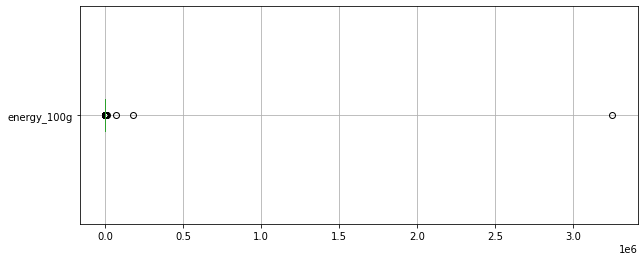

In [43]:
df = pd.DataFrame(data, columns=['energy_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True) 

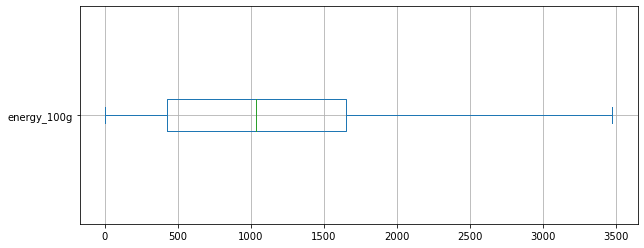

In [44]:
df = pd.DataFrame(data, columns=['energy_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True, showfliers=False) 

In [45]:
print(data.shape)
# On supprimera les produits avec ['energy_100g']>4000 
data =  data.loc[~(data['energy_100g']>4000),:]
print(data.shape)

(74355, 31)
(74275, 31)


**Les variables: '_100g'**

In [46]:
# Les variables à étudier 
columns_100g = list(data_fr.columns[data.columns.str.contains('_100g')])
columns_100g.remove('energy_100g')
columns_100g.remove('nutrition-score-fr_100g')
columns_100g.remove('nutrition-score-uk_100g')

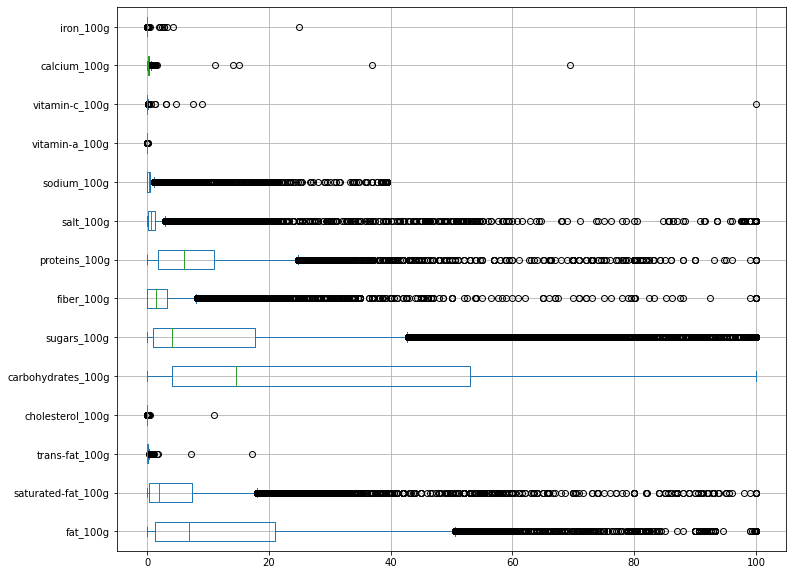

In [47]:
df = pd.DataFrame(data, columns=columns_100g)
ax = df.plot.box(vert=False, figsize=(12,10), grid=True) 

**Fer: 'iron_100g'**

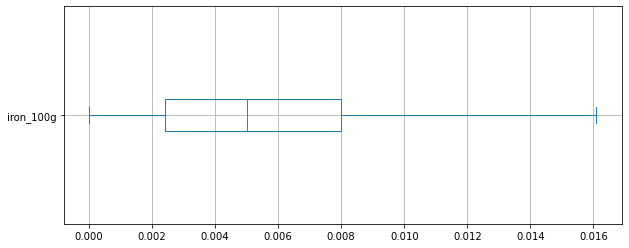

In [48]:
df = pd.DataFrame(data, columns=['iron_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True, showfliers=False) 

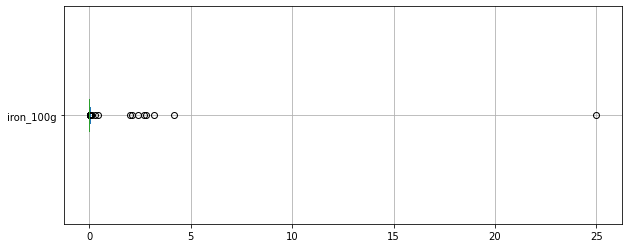

In [49]:
df = pd.DataFrame(data, columns=['iron_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True) 

In [50]:
data.loc[data['iron_100g']>5,:]

,code,url,creator,created_datetime,last_modified_datetime,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
74067,8934572400871,http://world-fr.openfoodfacts.org/produit/8934...,cestki13,2016-02-14T12:04:45Z,2017-02-01T20:46:47Z,Nems apéritifs aux crevettes & à l'ail,"Snacks salés,Apéritif,Biscuits apéritifs",France,"Galette de _blé_, _crevette_, ail, sucre, sel,...",d,Salty snacks,Appetizers,Snacks salés,1.0,2046.0,21.3,0.0,NaN,0.06322,61.7,7.89,2.45,12.6,2.2225,0.875,0.0,0.0,0.271,25.0,13.0,13.0


D'après l'étiquette du produit correspondant la valeur iron_100g est mal renseigné. On va la corriger. 

In [51]:
data.loc[data["code"]=='8934572400871',"iron_100g"]=0.00135

**'calcium_100g'**

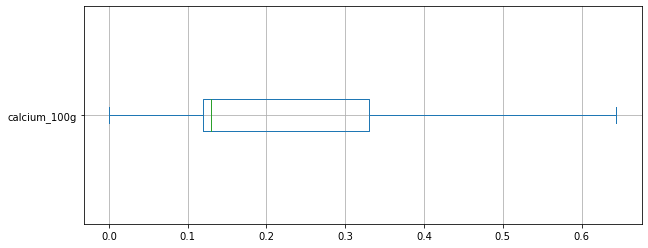

In [52]:
df = pd.DataFrame(data, columns=['calcium_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True, showfliers=False) 

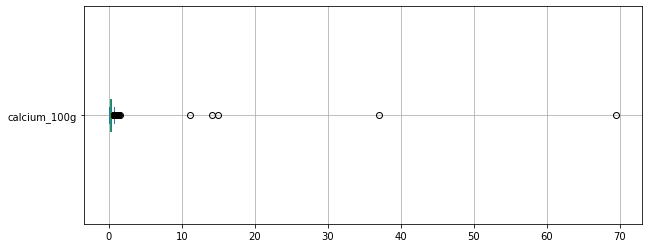

In [53]:
df = pd.DataFrame(data, columns=['calcium_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True)

In [54]:
data.loc[data['calcium_100g']>10,:]

,code,url,creator,created_datetime,last_modified_datetime,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
3421,20289126,http://world-fr.openfoodfacts.org/produit/2028...,tbgv31,2015-01-28T09:51:32Z,2017-01-31T16:35:23Z,Calcium + Vitamine D3,"Compléments alimentaires,Vitamines,Cachet-effe...","France,Allemagne","Acidifiants: acide citrique, acide malique; ca...",NaN,unknown,unknown,Compléments alimentaires,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.1,NaN,NaN,NaN
12679,3160920651304,http://world-fr.openfoodfacts.org/produit/3160...,tacite,2015-12-22T08:25:43Z,2015-12-22T08:28:38Z,Junior Vitamine C & Calcium goût Fraise à croquer,Compléments alimentaires,France,"Agent de charge : sorbitol, minéral : carbonat...",NaN,unknown,unknown,Compléments alimentaires,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.71,14.1,NaN,NaN,NaN
13794,3175680018939,http://world-fr.openfoodfacts.org/produit/3175...,davidgard,2014-08-31T14:35:18Z,2017-03-22T19:55:14Z,Gerblé biscuit muesli avoine,"Snacks sucrés,Biscuits et gâteaux,Biscuits",France,"Farine de _blé_ 48,5%, muesli 21,4% (flocons d...",c,Sugary snacks,Biscuits and cakes,Biscuits,7.0,1869.0,17.0,1.6,NaN,NaN,62.0,15.0,6.7,7.8,0.63,0.248031,NaN,NaN,37.0,NaN,6.0,6.0
40679,3401528535864,http://world-fr.openfoodfacts.org/produit/3401...,ungen,2017-01-24T00:17:46Z,2017-03-01T13:46:04Z,Centrum Men,Compléments alimentaires,France,Phosphate dicalcique ; Oxyde de magnésium ; Ca...,NaN,unknown,unknown,Compléments alimentaires,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0602,9.02,15.0,0.282,NaN,NaN
41756,3428274140029,http://world-fr.openfoodfacts.org/produit/3428...,openfoodfacts-contributors,2015-10-15T19:28:44Z,2016-05-22T08:00:13Z,Milk'nGO,"Aliments et boissons à base de végétaux,Boisso...",France,"_Lait_ demi-écrémé (55%), préparation fruits e...",e,Beverages,Sweetened beverages,Produits laitiers,5.0,276.0,0.8,0.5,NaN,NaN,12.7,10.8,NaN,2.1,0.10,0.039370,NaN,NaN,69.5,NaN,18.0,1.0


* Après la consultation du site https://fr.openfoodfacts.org/, les produits '20289126', '3160920651304', '3175680018939' et '3401528535864', sont mal renseignées pour la variable calcium_100g. On va les corrigée. 
* Pour le produit '3428274140029', la valeur est juste d'après l'étiquette. Mais je pense que c'est une erreur de saisie d'unité de g à mg. On peut pas avoir plus de la moitier d'un yaourth calcium ! 

In [55]:
data.loc[data["code"]=='20289126',"calcium_100g"]=0.5
data.loc[data["code"]=='3160920651304',"calcium_100g"]=0.120
data.loc[data["code"]=='3175680018939',"calcium_100g"]=0.383
data.loc[data["code"]=='3401528535864',"calcium_100g"]=0.200
data.loc[data["code"]=='3428274140029',"calcium_100g"]=0.695

**'vitamin-c_100g'**

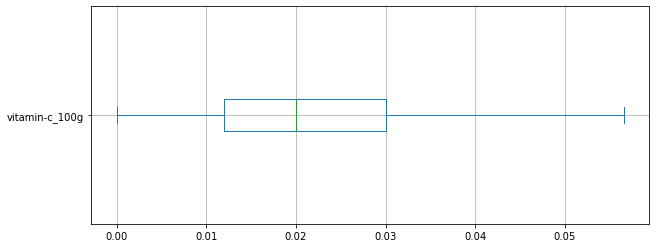

In [56]:
df = pd.DataFrame(data, columns=['vitamin-c_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True, showfliers=False) 

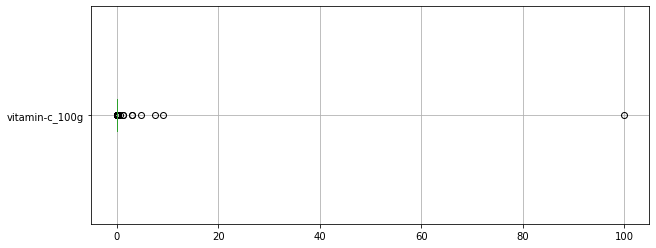

In [57]:
df = pd.DataFrame(data, columns=['vitamin-c_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True) 

In [58]:
data.loc[data['vitamin-c_100g']>1,:]

,code,url,creator,created_datetime,last_modified_datetime,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1511,0853471004387,http://world-fr.openfoodfacts.org/produit/0853...,usda-ndb-import,2017-03-10T10:32:31Z,2017-03-18T12:51:53Z,"Coconut Liquid Water Enhancer, Original",NaN,France,"Coconut and purified water, natural fruit flav...",b,NaN,NaN,NaN,2.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.50,NaN,NaN,0.0,0.0
1512,0853471004394,http://world-fr.openfoodfacts.org/produit/0853...,usda-ndb-import,2017-03-10T09:58:18Z,2017-03-19T16:24:23Z,Liquid Water Enhancer,NaN,France,"Purified and coconut water, natural fruit flav...",b,NaN,NaN,NaN,2.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.00,NaN,NaN,0.0,0.0
2295,2000000045389,http://world-fr.openfoodfacts.org/produit/2000...,beniben,2017-04-09T09:55:28Z,2017-04-09T10:07:05Z,Préparation pour boisson isotonique aromatisée...,"Boissons,Boissons non sucrées,Boissons sucrées...",France,"Glucose, fructose, maltodextrine, chlorure de ...",NaN,Beverages,Sweetened beverages,Boissons,4.0,1599.0,0.2,NaN,NaN,NaN,93.6,NaN,NaN,0.3,NaN,NaN,NaN,1.20,NaN,NaN,NaN,NaN
12679,3160920651304,http://world-fr.openfoodfacts.org/produit/3160...,tacite,2015-12-22T08:25:43Z,2015-12-22T08:28:38Z,Junior Vitamine C & Calcium goût Fraise à croquer,Compléments alimentaires,France,"Agent de charge : sorbitol, minéral : carbonat...",NaN,unknown,unknown,Compléments alimentaires,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.71,0.12,NaN,NaN,NaN
12692,3160921610300,http://world-fr.openfoodfacts.org/produit/3160...,kamounia,2014-06-05T14:26:55Z,2017-01-31T17:15:07Z,Juvamine Vitamine C500 à croquer sans sucres,Viatmine-c-en-comprimes,France,"Agent de charge : Sorbitol, Vitamine C, Anti-a...",NaN,unknown,unknown,Viatmine-c-en-comprimes,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN
40679,3401528535864,http://world-fr.openfoodfacts.org/produit/3401...,ungen,2017-01-24T00:17:46Z,2017-03-01T13:46:04Z,Centrum Men,Compléments alimentaires,France,Phosphate dicalcique ; Oxyde de magnésium ; Ca...,NaN,unknown,unknown,Compléments alimentaires,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0602,9.02,0.20,0.282,NaN,NaN
51027,3582910062561,http://world-fr.openfoodfacts.org/produit/3582...,lamiss33160,2015-07-07T15:26:41Z,2015-07-08T20:38:44Z,Topslim 3 en 1 Goût framboise,"Compléments alimentaires,Minceur",France,Dextrine de blé - Acide citrique (Acidifiant) ...,NaN,unknown,unknown,Compléments alimentaires,7.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.25,NaN,NaN,NaN,NaN
60553,4028864015837,http://world-fr.openfoodfacts.org/produit/4028...,alsy,2015-02-24T13:03:53Z,2015-02-24T13:47:43Z,CitroBiotic,Compléments alimentaires,France,Extrait glycérique des pépins et de l'écorce d...,NaN,unknown,unknown,Compléments alimentaires,1.0,1017.0,0.0,NaN,NaN,NaN,98.0,NaN,NaN,0.0,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN


In [59]:
data.loc[data["code"]=='3401528535864','vitamin-c_100g']=0.120

In [60]:
print(data.shape)
# On supprimera les produits avec ['vitamin-c_100g']>5 
data =  data.loc[~(data['vitamin-c_100g']>1),:]
print(data.shape)

(74275, 31)
(74268, 31)


**'vitamin-a_100g'**

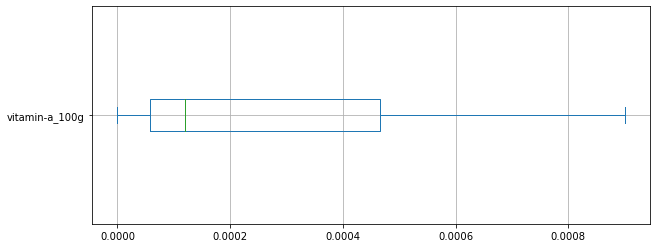

In [61]:
df = pd.DataFrame(data, columns=['vitamin-a_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True, showfliers=False) 

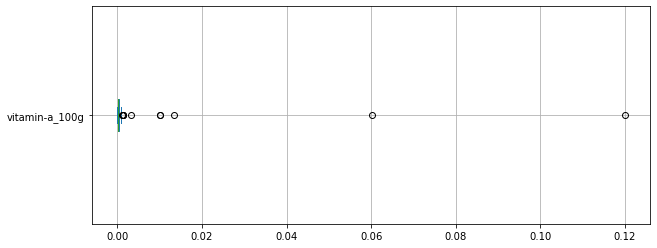

In [62]:
df = pd.DataFrame(data, columns=['vitamin-a_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True) 

In [63]:
data.loc[df['vitamin-a_100g']>0.05,:]

,code,url,creator,created_datetime,last_modified_datetime,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
40679,3401528535864,http://world-fr.openfoodfacts.org/produit/3401...,ungen,2017-01-24T00:17:46Z,2017-03-01T13:46:04Z,Centrum Men,Compléments alimentaires,France,Phosphate dicalcique ; Oxyde de magnésium ; Ca...,NaN,unknown,unknown,Compléments alimentaires,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0602,0.12,0.2,0.282,NaN,NaN
45832,3560070362486,http://world-fr.openfoodfacts.org/produit/3560...,del51,2015-10-19T11:40:30Z,2016-02-27T17:57:47Z,"Multifruits, boisson","Aliments et boissons à base de végétaux,Boisso...",France,"Eau, jus et purées de fruits à base de concent...",c,Beverages,Non-sugared beverages,Boissons,5.0,29.0,0.0,0.0,NaN,NaN,1.1,1.1,NaN,0.0,0.03,0.011811,0.1200,0.02,NaN,NaN,2.0,0.0


In [64]:
print(data.shape)
# On supprimera les produits avec ['vitamin-a_100g']>0.05  
data =  data.loc[~(data['vitamin-a_100g']>0.05),:]
print(data.shape)

(74268, 31)
(74266, 31)


**'sodium_100g'**

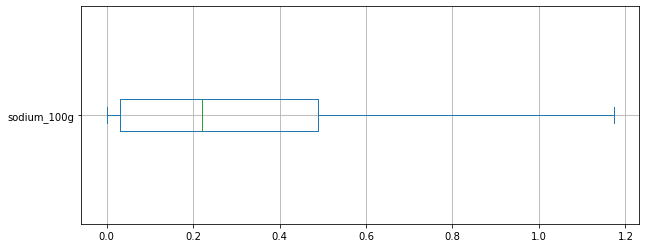

In [65]:
df = pd.DataFrame(data, columns=['sodium_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True, showfliers=False) 

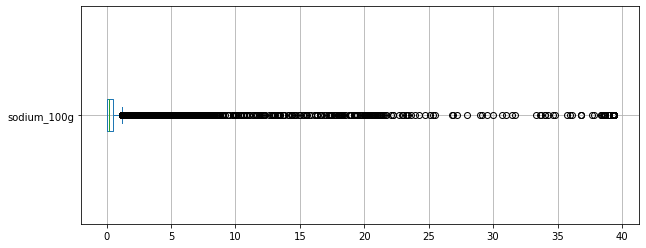

In [66]:
df = pd.DataFrame(data, columns=['sodium_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True) 

In [67]:
data.loc[data['sodium_100g']>30,:]

,code,url,creator,created_datetime,last_modified_datetime,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
334,0041278000057,http://world-fr.openfoodfacts.org/produit/0041...,openfoodfacts-contributors,2016-08-13T08:41:08Z,2017-03-09T11:56:49Z,Mixes up salt,NaN,"France,États-Unis",NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.00,85.72500,33.750000,NaN,NaN,NaN,NaN,NaN,NaN
337,0041331038300,http://world-fr.openfoodfacts.org/produit/0041...,nicolas97,2017-02-02T18:48:58Z,2017-03-09T12:26:39Z,NaN,NaN,"France,États-Unis",NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.00,91.44000,36.000000,NaN,NaN,NaN,NaN,NaN,NaN
1515,0855461003240,http://world-fr.openfoodfacts.org/produit/0855...,openfoodfacts-contributors,2013-10-13T10:29:18Z,2017-01-05T09:23:11Z,Aeroshot Energy Green Apple,Produits-energisants,France,"Caféine, arôme pomme naturel, extrait d'arhat,...",NaN,unknown,unknown,Produits-energisants,4.0,567.0,0.0,NaN,NaN,NaN,33.3,33.3,0.0,0.00,84.70000,33.300000,NaN,NaN,NaN,NaN,NaN,NaN
6731,3017800225745,http://world-fr.openfoodfacts.org/produit/3017...,kiliweb,2017-03-29T10:27:58Z,2017-03-29T10:27:58Z,Petits Pois,NaN,France,NaN,b,NaN,NaN,NaN,NaN,318.0,NaN,0.2,NaN,NaN,NaN,1.9,5.9,5.40,78.00000,30.708661,NaN,NaN,NaN,NaN,2.0,2.0
8209,3035626414051,http://world-fr.openfoodfacts.org/produit/3035...,kiliweb,2017-04-11T22:19:17Z,2017-04-11T22:19:19Z,Herbamare,NaN,France,"sel marin, plantes et légumes frais#, algue ma...",c,unknown,unknown,NaN,1.0,75.0,0.5,0.5,NaN,NaN,2.5,1.5,NaN,0.90,93.60000,36.850394,NaN,NaN,NaN,NaN,10.0,10.0
8210,3035626417243,http://world-fr.openfoodfacts.org/produit/3035...,kiliweb,2017-01-25T10:04:05Z,2017-01-25T10:10:05Z,Sel marin Herbamare,"Epicerie,Condiments,Sels,Sels marins",France,"Sel marin, légumes* et herbes aromatiques* (33...",NaN,unknown,unknown,Sels,0.0,75.0,0.0,0.0,NaN,NaN,2.5,NaN,0.0,0.90,93.60000,36.850394,NaN,NaN,NaN,NaN,NaN,NaN
8211,3035626803558,http://world-fr.openfoodfacts.org/produit/3035...,migmoug,2012-05-19T14:32:15Z,2017-04-15T12:47:15Z,Sel aux légumes et herbes,"Aliments et boissons à base de végétaux,Alimen...",France,"sel marin, plantes et légumes frais*, algue ma...",c,unknown,unknown,Sels,0.0,75.0,0.5,0.5,NaN,NaN,2.5,1.5,NaN,0.90,93.60000,36.850394,NaN,NaN,NaN,0.0024,10.0,10.0
8212,3035626803619,http://world-fr.openfoodfacts.org/produit/3035...,openfoodfacts-contributors,2013-04-25T11:37:53Z,2015-01-28T09:53:47Z,Herbamare,"Epicerie,Condiments,Sels,Sels marins",France,"sel marin, légumes et herbes aromatiques (33% ...",NaN,unknown,unknown,Sels,0.0,90.0,0.5,NaN,NaN,NaN,4.5,NaN,NaN,0.50,91.69400,36.100000,NaN,NaN,NaN,0.0024,NaN,NaN
12322,3144550004181,http://world-fr.openfoodfacts.org/produit/3144...,openfoodfacts-contributors,2016-11-09T22:05:59Z,2017-03-29T10:04:42Z,Sel marin naturel de l'Atlantique,NaN,France,NaN,c,NaN,NaN,NaN,NaN,4.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.00,99.00001,38.976382,NaN,NaN,NaN,NaN,10.0,10.0
12976,3165720448819,http://world-fr.openfoodfacts.org/produit/3165...,openfoodfacts-contributors,2016-09-16T07:13:24Z,2017-02-12T22:13:53Z,Sel d'Eincille,NaN,France,NaN,c,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.00,98.00000,38.582677,NaN,NaN,NaN,NaN,10.0,10.0


On supprimera les produits avec ['sodium_100g']>30 et qui n'ont pas le mot clès 'sel' ou 'salt' dans 'product_name'. 

In [68]:
print(data.shape)
# On supprimera les produits avec ['sodium_100g']>30 et qui n'ont pas le mot clès 'sel' ou 'salt' dans 'product_name'.
mask = (data['sodium_100g']>30) & (data['product_name'].str.contains("salt|sel", case=False)==False)
data =  data.loc[~mask,:]
print(data.shape)

(74266, 31)
(74252, 31)


**'salt_100g'**

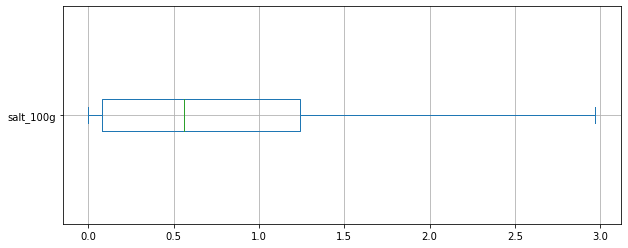

In [69]:
df = pd.DataFrame(data, columns=['salt_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True, showfliers=False) 

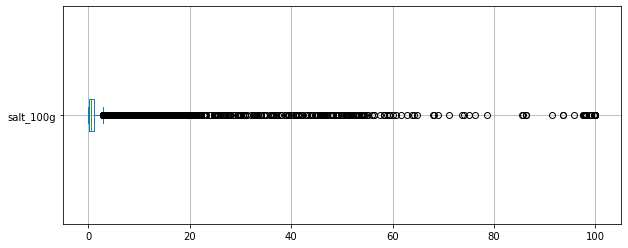

In [70]:
df = pd.DataFrame(data, columns=['salt_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True) 

In [71]:
data.loc[data['salt_100g']>80,:]

,code,url,creator,created_datetime,last_modified_datetime,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
334,0041278000057,http://world-fr.openfoodfacts.org/produit/0041...,openfoodfacts-contributors,2016-08-13T08:41:08Z,2017-03-09T11:56:49Z,Mixes up salt,NaN,"France,États-Unis",NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.00,85.72500,33.750000,NaN,NaN,NaN,NaN,NaN,NaN
337,0041331038300,http://world-fr.openfoodfacts.org/produit/0041...,nicolas97,2017-02-02T18:48:58Z,2017-03-09T12:26:39Z,NaN,NaN,"France,États-Unis",NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.00,91.44000,36.000000,NaN,NaN,NaN,NaN,NaN,NaN
8210,3035626417243,http://world-fr.openfoodfacts.org/produit/3035...,kiliweb,2017-01-25T10:04:05Z,2017-01-25T10:10:05Z,Sel marin Herbamare,"Epicerie,Condiments,Sels,Sels marins",France,"Sel marin, légumes* et herbes aromatiques* (33...",NaN,unknown,unknown,Sels,0.0,75.0,0.0,0.0,NaN,NaN,2.5,NaN,0.0,0.90,93.60000,36.850394,NaN,NaN,NaN,NaN,NaN,NaN
8211,3035626803558,http://world-fr.openfoodfacts.org/produit/3035...,migmoug,2012-05-19T14:32:15Z,2017-04-15T12:47:15Z,Sel aux légumes et herbes,"Aliments et boissons à base de végétaux,Alimen...",France,"sel marin, plantes et légumes frais*, algue ma...",c,unknown,unknown,Sels,0.0,75.0,0.5,0.5,NaN,NaN,2.5,1.5,NaN,0.90,93.60000,36.850394,NaN,NaN,NaN,0.0024,10.0,10.0
12322,3144550004181,http://world-fr.openfoodfacts.org/produit/3144...,openfoodfacts-contributors,2016-11-09T22:05:59Z,2017-03-29T10:04:42Z,Sel marin naturel de l'Atlantique,NaN,France,NaN,c,NaN,NaN,NaN,NaN,4.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.00,99.00001,38.976382,NaN,NaN,NaN,NaN,10.0,10.0
12976,3165720448819,http://world-fr.openfoodfacts.org/produit/3165...,openfoodfacts-contributors,2016-09-16T07:13:24Z,2017-02-12T22:13:53Z,Sel d'Eincille,NaN,France,NaN,c,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.00,98.00000,38.582677,NaN,NaN,NaN,NaN,10.0,10.0
13137,3166291151702,http://world-fr.openfoodfacts.org/produit/3166...,openfoodfacts-contributors,2013-04-27T19:23:51Z,2017-03-24T06:16:45Z,Moulin Sel de Guérande,"Aliments et boissons à base de végétaux,Alimen...",France,Sel marin gris de table de Guérande.,c,unknown,unknown,Sels,0.0,8.0,NaN,0.1,NaN,NaN,NaN,0.0,0.0,0.08,100.00000,39.370079,NaN,NaN,NaN,NaN,10.0,10.0
15019,3183280000650,http://world-fr.openfoodfacts.org/produit/3183...,openfoodfacts-contributors,2013-05-08T07:00:19Z,2017-02-13T15:06:01Z,Sel de mer,"Epicerie,Condiments,Sels,Sels de table,Sels fins",France,"sel de mer, fluorure de potassium : 250mg/kg (...",c,unknown,unknown,Sels,3.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.00,97.79000,38.500000,NaN,NaN,NaN,NaN,10.0,10.0
15020,3183280000728,http://world-fr.openfoodfacts.org/produit/3183...,openfoodfacts-contributors,2013-07-12T13:01:45Z,2016-12-15T16:19:10Z,Sel moulu de Méditerranée,"Epicerie,Condiments,Sels,Sels marins,Sels de t...",France,"Sel de mer, iodate potassium (15 à 20 mg/kg (e...",c,unknown,unknown,Sels,3.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.00,99.06000,39.000000,NaN,NaN,NaN,NaN,10.0,10.0
15021,3183280000896,http://world-fr.openfoodfacts.org/produit/3183...,jeanbono,2013-08-05T10:56:05Z,2016-03-02T21:12:44Z,Sel fin iodé,"Aliments et boissons à base de végétaux,Alimen...",France,"Sel de mer, iodure de sodium : 15 à 20 mg/kg, ...",c,unknown,unknown,Sels,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.00,99.82200,39.300000,NaN,NaN,NaN,NaN,10.0,10.0


**'proteins_100g'**

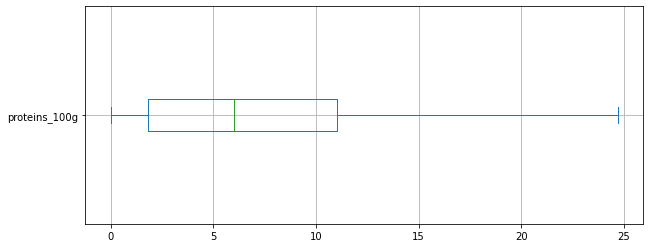

In [72]:
df = pd.DataFrame(data, columns=['proteins_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True, showfliers=False) 

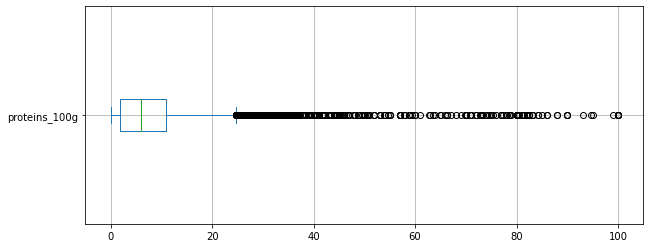

In [73]:
df = pd.DataFrame(data, columns=['proteins_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True) 

In [74]:
data.loc[(data['proteins_100g']>80)& (data['product_name'].str.contains("protein|protéine|proteine", case=False)==False),:]

,code,url,creator,created_datetime,last_modified_datetime,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1360,0698502500571,http://world-fr.openfoodfacts.org/produit/0698...,kiliweb,2017-03-30T19:35:35Z,2017-03-30T19:35:35Z,Savarez - Jeu De Cordes,NaN,France,NaN,a,NaN,NaN,NaN,NaN,4.0,NaN,0.10,NaN,NaN,NaN,0.10,100.00,100.0,0.00,0.000000,NaN,NaN,NaN,NaN,-10.0,-10.0
1536,0883929140886,http://world-fr.openfoodfacts.org/produit/0883...,kiliweb,2017-03-24T19:23:33Z,2017-04-07T13:46:29Z,Harry Potter & The Deathly Hallows Radcliffe /...,Non alimentaire,France,NaN,a,unknown,unknown,Non alimentaire,NaN,4.0,NaN,0.00,NaN,NaN,NaN,0.00,100.00,100.0,0.00,0.000000,NaN,NaN,NaN,NaN,-10.0,-10.0
4194,20621346,http://world-fr.openfoodfacts.org/produit/2062...,kiliweb,2017-03-30T13:00:04Z,2017-03-30T13:00:04Z,Crownfield Choco Rice,NaN,France,NaN,c,NaN,NaN,NaN,NaN,1623.0,NaN,1.10,NaN,NaN,NaN,28.90,5.40,84.2,0.50,0.196850,NaN,NaN,NaN,NaN,8.0,8.0
10851,3092718618971,http://world-fr.openfoodfacts.org/produit/3092...,kiliweb,2017-04-11T11:39:42Z,2017-04-11T11:39:42Z,Sirop Fraise,"Boissons,Boissons non sucrées",France,"Sucre, sirop de glucose-fructose, jus de fruit...",e,Beverages,Non-sugared beverages,Boissons,1.0,180.0,0.0,0.00,NaN,NaN,10.6,10.60,0.00,86.0,0.00,0.000000,NaN,NaN,NaN,NaN,14.0,-3.0
26599,3257983765946,http://world-fr.openfoodfacts.org/produit/3257...,kiliweb,2017-02-13T06:53:58Z,2017-03-25T11:15:55Z,Edulcorant a l'extrait de stevia,"Aliments et boissons à base de végétaux,Alimen...",France,NaN,b,unknown,unknown,Aliments et boissons à base de végétaux,NaN,1556.0,NaN,0.00,NaN,NaN,NaN,6.90,0.00,93.1,0.08,0.031496,NaN,NaN,NaN,NaN,0.0,0.0
34435,3286011051744,http://world-fr.openfoodfacts.org/produit/3286...,kiliweb,2017-03-19T16:16:24Z,2017-04-02T10:34:42Z,"Lingettes pocket pour visage et mains, biodégr...","Non alimentaire,Open Beauty Facts",France,NaN,d,unknown,unknown,Non alimentaire,NaN,1912.0,NaN,6.00,NaN,NaN,NaN,6.00,1.00,99.0,2.00,0.787402,NaN,NaN,NaN,NaN,18.0,18.0
34513,3288110751518,http://world-fr.openfoodfacts.org/produit/3288...,kiliweb,2017-03-03T13:29:30Z,2017-03-03T13:29:30Z,Apurna Pure Whey Isolat Vanille - Pot 750G,NaN,France,NaN,b,NaN,NaN,NaN,NaN,1602.0,NaN,1.10,NaN,NaN,NaN,3.10,1.00,81.3,0.23,0.090551,NaN,NaN,NaN,NaN,0.0,0.0
34514,3288110751525,http://world-fr.openfoodfacts.org/produit/3288...,kiliweb,2017-02-19T19:48:54Z,2017-02-19T19:48:54Z,Apurna Pure Whey Isolat Cacao - Pot 750G,NaN,France,NaN,c,NaN,NaN,NaN,NaN,1586.0,NaN,1.40,NaN,NaN,NaN,2.90,0.01,82.4,0.70,0.275591,NaN,NaN,NaN,NaN,3.0,3.0
38410,3350033331259,http://world-fr.openfoodfacts.org/produit/3350...,openfoodfacts-contributors,2016-11-06T18:26:55Z,2017-02-22T12:07:22Z,Fromage blanc brebis,NaN,France,NaN,a,NaN,NaN,NaN,NaN,364.0,NaN,3.20,NaN,NaN,NaN,2.90,0.00,94.7,0.10,0.039370,NaN,NaN,NaN,NaN,-1.0,-1.0
44620,3518681004691,http://world-fr.openfoodfacts.org/produit/3518...,kiliweb,2017-03-03T13:27:12Z,2017-03-03T13:27:12Z,Eafit Pure Isolate 100% Whey Chocolate 750G (m...,NaN,France,NaN,a,NaN,NaN,NaN,NaN,1515.0,NaN,0.80,NaN,NaN,NaN,0.90,3.20,81.0,0.55,0.216535,NaN,NaN,NaN,NaN,-3.0,-3.0


In [75]:
print(data.shape)
# On remplacera les produits avec ['proteins_100g']>80 et qui n'ont pas le mot clès protein, protéine ou proteine dans 'product_name' par 0.
mask = (data['proteins_100g']>80) & (data['product_name'].str.contains("protein|protéine|proteine", case=False)==False)
data.loc[mask,'proteins_100g']=0
print(data.shape)

(74252, 31)
(74252, 31)


**'fiber_100g'**

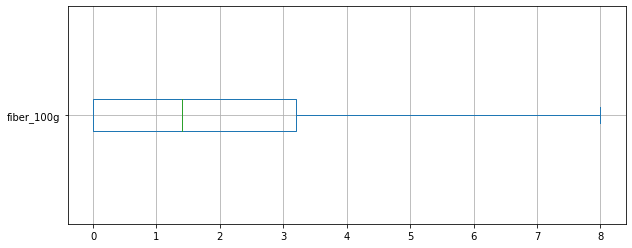

In [76]:
df = pd.DataFrame(data, columns=['fiber_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True, showfliers=False) 

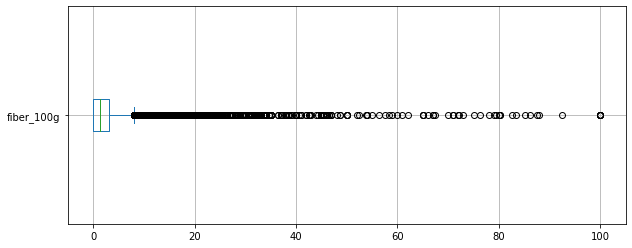

In [77]:
df = pd.DataFrame(data, columns=['fiber_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True) 

In [78]:
data.loc[data['fiber_100g']>80,:]

,code,url,creator,created_datetime,last_modified_datetime,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1360,0698502500571,http://world-fr.openfoodfacts.org/produit/0698...,kiliweb,2017-03-30T19:35:35Z,2017-03-30T19:35:35Z,Savarez - Jeu De Cordes,NaN,France,NaN,a,NaN,NaN,NaN,NaN,4.0,NaN,0.10,NaN,NaN,NaN,0.1,100.00,0.00,0.0000,0.000000,NaN,NaN,NaN,NaN,-10.0,-10.0
1536,0883929140886,http://world-fr.openfoodfacts.org/produit/0883...,kiliweb,2017-03-24T19:23:33Z,2017-04-07T13:46:29Z,Harry Potter & The Deathly Hallows Radcliffe /...,Non alimentaire,France,NaN,a,unknown,unknown,Non alimentaire,NaN,4.0,NaN,0.00,NaN,NaN,NaN,0.0,100.00,0.00,0.0000,0.000000,NaN,NaN,NaN,NaN,-10.0,-10.0
39674,3380380057649,http://world-fr.openfoodfacts.org/produit/3380...,segundo,2017-02-14T15:08:56Z,2017-03-02T15:52:48Z,Mix'Gom,NaN,France,NaN,a,unknown,unknown,NaN,NaN,54.0,NaN,0.13,NaN,NaN,NaN,0.0,85.20,1.80,0.6250,0.246063,NaN,NaN,NaN,NaN,-4.0,-4.0
51050,3583788522898,http://world-fr.openfoodfacts.org/produit/3583...,kiliweb,2017-03-04T13:09:20Z,2017-03-04T13:09:21Z,Isotonic Sport Drink,NaN,France,NaN,d,NaN,NaN,NaN,NaN,1523.0,NaN,0.00,NaN,NaN,NaN,78.2,92.40,0.00,1.8000,0.708661,NaN,NaN,NaN,NaN,16.0,16.0
51181,3590670000174,http://world-fr.openfoodfacts.org/produit/3590...,kiliweb,2017-04-17T15:10:20Z,2017-04-17T15:10:22Z,Noix sèches,NaN,France,Noix sèches,a,unknown,unknown,NaN,0.0,0.0,0.00,0.00,NaN,NaN,0.00,0.0,100.00,0.00,0.0000,0.000000,NaN,NaN,NaN,NaN,-5.0,-5.0
56378,3760020501518,http://world-fr.openfoodfacts.org/produit/3760...,pth,2015-04-26T09:42:33Z,2017-03-14T08:33:47Z,Agar-agar,"Aliments et boissons à base de végétaux,Alimen...",France,agar-agar (Gracilaria sp.),a,Fish Meat Eggs,Fish and seafood,Produits de la mer,1.0,177.0,0.00,0.00,NaN,NaN,0.50,0.0,86.20,0.60,0.0381,0.015000,NaN,NaN,NaN,NaN,-5.0,-5.0
56421,3760020504717,http://world-fr.openfoodfacts.org/produit/3760...,gil,2016-03-31T17:42:36Z,2017-03-15T08:45:49Z,Konjac Cuisine,Aide-culinaire,France,Poudre de Konjac (50%) ; fibre de chicorée.,a,unknown,unknown,Aide-culinaire,0.0,804.0,0.25,0.00,NaN,NaN,4.85,0.0,87.50,0.75,0.1270,0.050000,NaN,NaN,NaN,NaN,-3.0,-3.0
57488,3760087360585,http://world-fr.openfoodfacts.org/produit/3760...,kiliweb,2017-01-28T16:46:40Z,2017-02-10T06:51:08Z,Psyllium Blond,Compléments alimentaires,France,Poudre de téguments de psyllium blond (plantag...,a,unknown,unknown,Compléments alimentaires,0.0,163.0,0.00,0.00,NaN,NaN,1.80,0.0,80.15,7.80,0.0000,0.000000,NaN,NaN,NaN,NaN,-9.0,-9.0
57502,3760087361230,http://world-fr.openfoodfacts.org/produit/3760...,kiliweb,2017-04-07T20:19:37Z,2017-04-07T20:19:37Z,Psyllium Blond En Poudre Bio - 600 G - Ethnosc...,NaN,France,NaN,a,NaN,NaN,NaN,NaN,163.0,NaN,0.00,NaN,NaN,NaN,1.8,80.15,7.80,0.0000,0.000000,NaN,NaN,NaN,NaN,-9.0,-9.0
62394,5051889553625,http://world-fr.openfoodfacts.org/produit/5051...,kiliweb,2017-03-24T19:22:13Z,2017-03-24T19:22:13Z,Le Hobbit : La Bataille Des Cinq Armés - Versi...,NaN,France,NaN,a,NaN,NaN,NaN,NaN,4.0,NaN,0.00,NaN,NaN,NaN,0.0,100.00,0.00,0.0000,0.000000,NaN,NaN,NaN,NaN,-10.0,-10.0


In [79]:
print(data.shape)
# On supprimera les produits avec ['fiber_100g']>80.
mask = data['fiber_100g']>80
data =  data.loc[~mask,:]
print(data.shape)

(74252, 31)
(74237, 31)


**'cholesterol_100g'**

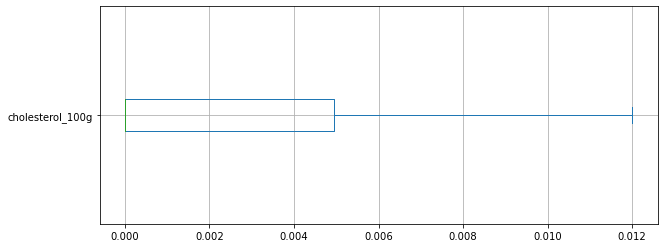

In [80]:
df = pd.DataFrame(data, columns=['cholesterol_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True, showfliers=False) 

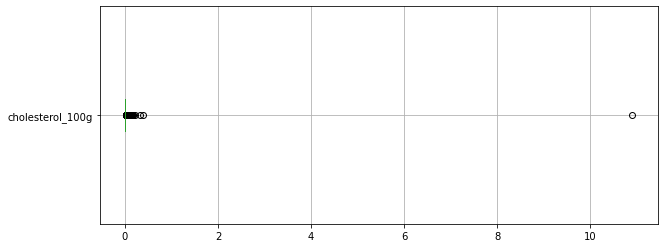

In [81]:
df = pd.DataFrame(data, columns=['cholesterol_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True) 

In [82]:
data.loc[data['cholesterol_100g']>1,:]

,code,url,creator,created_datetime,last_modified_datetime,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
65138,5412038381481,http://world-fr.openfoodfacts.org/produit/5412...,openfoodfacts-contributors,2014-06-20T18:22:15Z,2017-04-14T13:41:25Z,Praliné Lait,"Snacks sucrés,Chocolats,Chocolats au lait,Choc...",France,"chocolat : sucre, poudre de _lait_ entier, beu...",e,Sugary snacks,Chocolate products,Chocolats,1.0,2395.0,37.3,20.6,NaN,10.9,51.9,50.3,2.1,5.7,0.2,0.07874,NaN,NaN,NaN,NaN,25.0,25.0


Pas d'erreur selon l'étiquette du produit sur le site fr.openfoodfacts.org/. Mais cette valeur est aberrante. On supprimera ce produit.  

In [83]:
print(data.shape)
# On supprimera les produits avec ['cholesterol_100g']>1.
mask = data['cholesterol_100g']>1
data =  data.loc[~mask,:]
print(data.shape)

(74237, 31)
(74236, 31)


**'trans-fat_100g'**

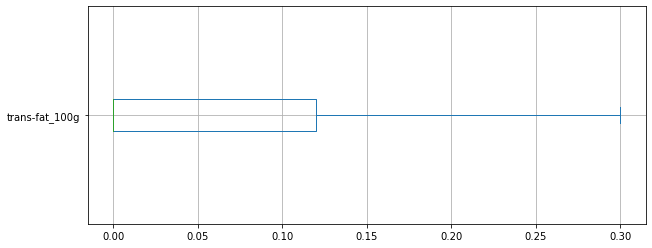

In [84]:
df = pd.DataFrame(data, columns=['trans-fat_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True, showfliers=False) 

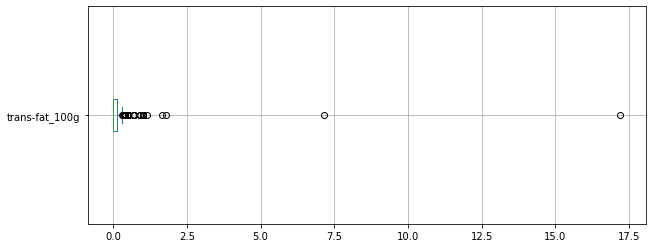

In [85]:
df = pd.DataFrame(data, columns=['trans-fat_100g'])
ax = df.plot.box(vert=False, figsize=(10,4), grid=True) 

In [86]:
data.loc[data['trans-fat_100g']>2,:]

,code,url,creator,created_datetime,last_modified_datetime,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
22873,3254550025090,http://world-fr.openfoodfacts.org/produit/3254...,jeanbono,2013-07-06T08:27:27Z,2013-09-24T23:48:25Z,Beurre d'Isigny,"Produits à tartiner,Produits laitiers,Matières...",France,"Crème de lait, ferments lactiques, sel gros gr...",e,Fat and sauces,Fats,Beurres,0.0,3290.0,78.6,57.1,7.14,0.214,0.0,0.0,NaN,0.0,2.0,0.786,0.000857,0.0,0.0,0.0,27.0,27.0
33619,3276550562764,http://world-fr.openfoodfacts.org/produit/3276...,yann1,2016-11-18T19:30:08Z,2016-11-18T19:40:45Z,Carrefour Pain au chocolat classique,"Snacks sucrés,Viennoiseries",France,"Farine de blé, eau, matières grasses 18.5% (hu...",NaN,sugary-snacks,pastries,Snacks sucrés,5.0,NaN,18.5,NaN,17.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
data.loc[data["code"]=='3254550025090','trans-fat_100g']=1

In [88]:
print(data.shape)
# On supprimera les produits avec ['trans-fat_100g']>2.
mask = data['trans-fat_100g']>2
data =  data.loc[~mask,:]
print(data.shape)

(74236, 31)
(74235, 31)


In [89]:
data_4 = data.copy()

133 lignes ont été supprimées au total après l'étape des valeurs atypiques. 

# Traitement des valeurs manquantes et erreurs de type

In [90]:
df = data_4.copy()
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes('float')

## Les variables qualitatives ('object') 

In [91]:
# Les valeurs qualitatives manquantes 
df_cat.isna().sum().sort_values()

code                          0
url                           0
creator                       0
last_modified_datetime        0
countries_fr                  0
created_datetime              1
product_name                406
nutrition_grade_fr        12941
pnns_groups_2             14083
pnns_groups_1             15647
categories_fr             17178
main_category_fr          17178
ingredients_text          20810
dtype: int64

In [92]:
df_obj.head(2)

,code,url,creator,created_datetime,last_modified_datetime,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,NaN,France,NaN,NaN,NaN,NaN,NaN
1,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,2015-06-17T08:45:04Z,2015-06-17T10:11:54Z,Filet de bœuf,Filet-de-boeuf,France,NaN,NaN,unknown,unknown,Filet-de-boeuf


### Les variables: 'created_datetime' et 'last_modified_datetime'

**Correction de type** 

In [93]:
# convertir les colonnes 'created_datetime' et 'last_modified_datetime' en type datetime
df['created_datetime'] = pd.to_datetime(df['created_datetime'])
df['last_modified_datetime'] = pd.to_datetime(df['last_modified_datetime'])

In [94]:
df.dtypes.value_counts()

float64                18
object                 11
datetime64[ns, UTC]     2
dtype: int64

**Traitement des valeurs manquantes**  
Une seule valeur manquante dans le jeu de donnée. Elle sera remplacer par la valeur indiquer dans la variable 'last_modified_datetime'. On supposera que la création et la modifiacation ont été le même jour. 	

In [95]:
df.loc[df['created_datetime'].isna(),:]

,code,url,creator,created_datetime,last_modified_datetime,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
6468,3017760038409,http://world-fr.openfoodfacts.org/produit/3017...,marianne,NaT,2017-03-08 16:54:15+00:00,Lulu la barquette (Fraise),"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bar...","France,Suisse","Sirop de glucose-fructose, purée de fraises 27...",d,Sugary snacks,Biscuits and cakes,Biscuits,2.0,1480.0,2.1,0.5,NaN,NaN,78.0,60.0,1.2,4.2,0.08,0.031496,NaN,NaN,NaN,NaN,13.0,13.0


In [96]:
# dans le jeu de donnée initial 
data_Food.loc[data_Food['code'] == '3017760038409' ,:]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
187478,3017760038409,http://world-fr.openfoodfacts.org/produit/3017...,marianne,0,NaN,1488992055,2017-03-08T16:54:15Z,Lulu la barquette (Fraise),Génoise garnie à la purée de fraise,120 g,"Paquet,Carton","paquet,carton",LU,lu,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","Snacks sucrés,Biscuits et gâteaux,Biscuits,Bar...",NaN,NaN,"France,Ardennes","france,ardennes","Sans colorants,Sans conservateurs","en:no-colorings,en:no-preservatives","Sans colorants,Sans conservateurs",NaN,NaN,NaN,NaN,NaN,"Courrières,France",Cora,"France,Suisse","en:france,en:switzerland","France,Suisse","Sirop de glucose-fructose, purée de fraises 27...","blé, œufs",NaN,"Lait,Fruits à coque","en:milk,en:nuts","Lait,Fruits à coque","Un biscuit (6,66g)",NaN,2.0,[ sirop-de-glucose-fructose -> fr:sirop-de-gl...,"en:e440,en:e330","E440 - Pectines,E330 - Acide citrique",0.0,NaN,NaN,0.0,NaN,NaN,NaN,d,Sugary snacks,Biscuits and cakes,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:biscuits,Biscuits,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...,1480.0,NaN,2.1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

'created_t' = 0 donc pas d'indication sur la date de création

In [97]:
# remplacement de la date de création vide par la date de modification
df.loc[df['created_datetime'].isna(),'created_datetime']=df.loc[df['created_datetime'].isna(),'last_modified_datetime'] 

In [98]:
df['created_datetime'].isna().sum()

0

Pas de valeurs manquantes pour 'created_datetime'

### Les variables: 'pnn_group'

On remplacer les valeurs manquantes des variables pnn_group_1 et pnn_group_2 par 'unknown'.

In [99]:
df.pnns_groups_1.unique()

array(['unknown', 'Cereals and potatoes', 'Sugary snacks', 'Beverages',
       nan, 'Fish Meat Eggs', 'Composite foods', 'Fruits and vegetables',
       'Milk and dairy products', 'Fat and sauces', 'Salty snacks',
       'fruits-and-vegetables', 'sugary-snacks', 'cereals-and-potatoes'],
      dtype=object)

In [100]:
df.pnns_groups_2.unique()

array(['unknown', 'Legumes', 'Biscuits and cakes',
       'Non-sugared beverages', nan, 'Sweetened beverages', 'Meat',
       'One-dish meals', 'Soups', 'Cheese', 'Sweets', 'Sandwich',
       'Dressings and sauces', 'Appetizers', 'Dried fruits', 'Nuts',
       'Breakfast cereals', 'Pizza pies and quiche', 'Fruits',
       'Fruit juices', 'Cereals', 'Vegetables', 'Bread',
       'Chocolate products', 'Processed meat', 'vegetables', 'Ice cream',
       'Fish and seafood', 'Alcoholic beverages', 'pastries',
       'Milk and yogurt', 'Dairy desserts', 'Fats', 'Tripe dishes',
       'Artificially sweetened beverages', 'Fruit nectars', 'Potatoes',
       'Eggs', 'Salty and fatty products', 'fruits', 'legumes', 'cereals'],
      dtype=object)

In [101]:
# remplacement de pnn_group vide par 'unknown'
df['pnns_groups_1'].fillna(value='unknown', inplace=True)
df['pnns_groups_2'].fillna(value='unknown', inplace=True)

In [102]:
df.pnns_groups_1.isna().sum()

0

In [103]:
df.pnns_groups_2.isna().sum()

0

In [104]:
data_51 = df.copy()

## Les variables quantitatives ('float')

In [105]:
df = data_51.copy()
df_num = df.select_dtypes('float')

In [106]:
df_num.isna().sum().sort_values()

energy_100g                 9770
proteins_100g              10045
salt_100g                  11786
sodium_100g                11789
sugars_100g                11846
saturated-fat_100g         11984
nutrition-score-uk_100g    12941
nutrition-score-fr_100g    12941
additives_n                20810
fat_100g                   26637
carbohydrates_100g         27068
fiber_100g                 28627
calcium_100g               71984
vitamin-c_100g             72948
iron_100g                  73054
vitamin-a_100g             73649
cholesterol_100g           73822
trans-fat_100g             73851
dtype: int64

In [107]:
df_num.dropna().round(2).sample(5)

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
143,1.0,187.0,0.00,0.00,0.0,0.00,11.00,11.00,0.0,0.00,0.06,0.02,0.0,0.0,0.01,0.00,15.0,2.0
1509,4.0,345.0,1.76,1.18,0.0,0.01,12.90,8.24,0.0,2.35,0.18,0.07,0.0,0.0,0.09,0.00,2.0,2.0
207,2.0,1849.0,18.58,7.96,0.0,0.02,66.37,35.40,1.8,3.54,0.61,0.24,0.0,0.0,0.02,0.00,19.0,19.0
73847,6.0,201.0,0.00,0.00,0.0,0.00,12.00,10.80,0.0,0.00,0.01,0.00,0.0,0.0,0.00,0.00,15.0,2.0
30370,2.0,973.0,16.70,1.33,0.0,0.03,13.30,6.67,0.0,1.33,2.71,1.07,0.0,0.0,0.27,0.01,14.0,14.0


### La variable: 'additives_n'

Dans la suite, on remplacera les valeurs manquantes par zéro pour la variable 'additives_n'. On fera l'hypothèse que si la valeur est manquante cela veut dire qu'il n y'a pas d'additives. 

In [108]:
# Remplacement des valeurs manquantes par zéro
df['additives_n'].fillna(value= 0 , inplace=True)

In [109]:
df_num.isna().sum().sort_values()

additives_n                    0
energy_100g                 9770
proteins_100g              10045
salt_100g                  11786
sodium_100g                11789
sugars_100g                11846
saturated-fat_100g         11984
nutrition-score-fr_100g    12941
nutrition-score-uk_100g    12941
fat_100g                   26637
carbohydrates_100g         27068
fiber_100g                 28627
calcium_100g               71984
vitamin-c_100g             72948
iron_100g                  73054
vitamin-a_100g             73649
cholesterol_100g           73822
trans-fat_100g             73851
dtype: int64

### Les variables:  '_100g'

Dans la suite, les valeurs manquantes des variables '_100g' seront remplacées selon l'algorithme KNN

In [110]:
df_num.sample(5)

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
70368,0.0,2644.0,NaN,1.1,NaN,NaN,NaN,0.1,0.0,32.60,3.73,1.468504,NaN,NaN,NaN,NaN,18.0,18.0
34448,0.0,3138.0,84.43,51.9,NaN,NaN,0.4,0.4,NaN,0.42,0.01,0.003937,NaN,NaN,NaN,NaN,18.0,19.0
65416,3.0,1520.0,1.10,0.6,NaN,NaN,77.0,2.9,NaN,8.70,1.25,0.492126,NaN,NaN,NaN,NaN,NaN,NaN
35562,1.0,481.0,4.50,0.4,NaN,NaN,11.0,2.8,NaN,7.50,1.80,0.708661,NaN,NaN,NaN,NaN,4.0,4.0
39421,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
# On entraine le modèle d'imputation sur un échantillon de données
df_sample = df_num.sample(frac=0.5, random_state=1)
imputer = KNNImputer(n_neighbors=5)
imputer.fit(df_sample)

KNNImputer()

In [112]:
# Puis on applique le modèle sur l'ensemble des données
df_num_imputed = imputer.transform(df_num)

In [113]:
ddf_num_imputed = pd.DataFrame(df_num_imputed, columns=df_num.columns)

In [114]:
ddf_num_imputed.isna().sum().sort_values()

additives_n                0
iron_100g                  0
calcium_100g               0
vitamin-c_100g             0
vitamin-a_100g             0
sodium_100g                0
salt_100g                  0
proteins_100g              0
fiber_100g                 0
sugars_100g                0
carbohydrates_100g         0
cholesterol_100g           0
trans-fat_100g             0
saturated-fat_100g         0
fat_100g                   0
energy_100g                0
nutrition-score-fr_100g    0
nutrition-score-uk_100g    0
dtype: int64

In [115]:
df_cat = df.select_dtypes('object')
df_dtime = df.select_dtypes('datetime64[ns, UTC]')

# Combine horizontal 
df_obj = pd.merge(df_cat, df_dtime, on = df_cat.index)
df_obj = df_obj.drop(['key_0'], axis=1)

In [116]:
df_obj.head(2)

,code,url,creator,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,created_datetime,last_modified_datetime
0,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,Lion Peanut x2,NaN,"France,États-Unis","Milk chocolate coating (evaporated cane juice,...",e,unknown,unknown,NaN,2015-01-25 21:35:01+00:00,2017-03-09 10:34:27+00:00
1,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,teolemon,Pack de 2 Twix,NaN,"France,États-Unis",NaN,NaN,unknown,unknown,NaN,2015-01-01 21:17:31+00:00,2017-03-09 10:34:12+00:00


In [117]:
df_imputed = pd.merge(df_obj, ddf_num_imputed, on = df_obj.index)
df_imputed = df_imputed.drop(['key_0'], axis=1)

In [118]:
df_imputed.head(2)

,code,url,creator,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,created_datetime,last_modified_datetime,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,Lion Peanut x2,NaN,"France,États-Unis","Milk chocolate coating (evaporated cane juice,...",e,unknown,unknown,NaN,2015-01-25 21:35:01+00:00,2017-03-09 10:34:27+00:00,1.0,1883.0,20.00,12.50,0.324,0.012,70.00,57.500,2.5,2.50,0.096520,0.03800,0.000255,0.06300,0.10000,0.00090,22.0,22.0
1,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,teolemon,Pack de 2 Twix,NaN,"France,États-Unis",NaN,NaN,unknown,unknown,NaN,2015-01-01 21:17:31+00:00,2017-03-09 10:34:12+00:00,0.0,1481.0,4.17,1.12,0.040,0.000,77.08,30.036,6.2,6.25,0.016713,0.24384,0.000325,0.02859,0.07592,0.00075,0.0,0.0


In [119]:
data_5 = df_imputed.copy()

**Observations avant et après imputation knn**

In [10]:
# fig = px.histogram(data_4, x="trans-fat_100g", marginal="box", title='Avant imputation KNN')
# fig.show()

In [9]:
# fig = px.histogram(data_5, x="trans-fat_100g", marginal="box", title='Après imputation KNN')
# fig.show()

In [8]:
# fig = px.histogram(data_4, x="saturated-fat_100g", marginal="box", title='Avant imputation KNN')
# fig.show()

In [7]:
# fig = px.histogram(data_5, x="saturated-fat_100g", marginal="box", title='Après imputation KNN')
# fig.show()

In [6]:
# fig = px.histogram(data_4, x="proteins_100g", marginal="box", title='Avant imputation KNN')
# fig.show()

In [5]:
# fig = px.histogram(data_5, x="proteins_100g", marginal="box", title='Après imputation KNN')
# fig.show()

In [4]:
# fig = px.histogram(data_4, x="cholesterol_100g", marginal="box", title='Avant imputation KNN')
# fig.show()

In [3]:
# fig = px.histogram(data_5, x="cholesterol_100g", marginal="box", title='Après imputation KNN')
# fig.show()

In [2]:
# fig = px.histogram(data_4, x="vitamin-c_100g", marginal="box", title='Avant imputation KNN')
# fig.show()

In [1]:
# fig = px.histogram(data_5, x="vitamin-c_100g", marginal="box", title='Après imputation KNN')
# fig.show()

In [130]:
data_5.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000
mean,1.336081,1098.975658,15.485199,5.381542,0.060425,0.016925,25.824153,15.171771,2.069124,8.120374,1.205256,0.459015,0.000595,0.022473,0.059334,0.032880,8.775483,8.554975
std,2.326844,731.404374,15.493176,7.856967,0.109938,0.019789,23.160358,18.443746,3.473455,7.318101,3.935159,1.541841,0.000757,0.017137,0.079199,0.126434,8.570303,8.933789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,0.000000,487.000000,1.500000,0.400000,0.000000,0.000200,6.600000,1.500000,0.100000,2.500000,0.100000,0.039370,0.000272,0.008400,0.031720,0.001841,1.000000,1.000000
50%,0.000000,973.000000,13.190000,2.600000,0.014000,0.009400,19.000000,6.700000,1.362000,6.670000,0.476000,0.194646,0.000350,0.020600,0.038760,0.003355,10.000000,9.000000
75%,2.000000,1615.000000,24.120000,6.300000,0.100000,0.033822,36.580000,24.100000,2.340000,12.000000,1.200000,0.472441,0.000455,0.029320,0.057820,0.006601,14.000000,14.600000
max,31.000000,4000.000000,100.000000,100.000000,1.780000,0.378000,100.000000,100.000000,80.000000,90.000000,100.000000,39.370079,0.013433,0.582000,1.534000,4.200000,40.000000,36.000000


# Enregistrement des données nettoyées 

In [131]:
data_5.dropna().head(5)

,code,url,creator,product_name,categories_fr,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,created_datetime,last_modified_datetime,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
8,0000040608754,http://world-fr.openfoodfacts.org/produit/0000...,andre,"Pepsi, Nouveau goût !","Boissons,Boissons gazeuses,Sodas,Sodas au cola...",France,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,Sweetened beverages,Sodas,2012-08-15 09:48:28+00:00,2015-08-09 17:35:31+00:00,2.0,177.0,0.0,0.0,0.000,0.0000,10.4,10.4,0.0,0.0,0.0254,0.010000,0.000072,0.01450,0.01590,0.000021,13.0,2.0
10,0000087177756,http://world-fr.openfoodfacts.org/produit/0000...,tacite,7Up,"Aliments et boissons à base de végétaux,Boisso...",France,"Eau gazéifiée, sucre, acidifiants (acide citri...",e,Beverages,Sweetened beverages,Sodas aux fruits,2015-06-06 10:28:06+00:00,2015-06-06 11:13:26+00:00,3.0,177.0,0.0,0.0,0.000,0.0000,10.4,10.4,0.0,0.0,0.1000,0.039370,0.000072,0.01450,0.04466,0.000021,13.0,2.0
11,000010,http://world-fr.openfoodfacts.org/produit/0000...,jeanbono,Madeleines nature,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",France,"Farine de _blé_, huile de colza, sucre, _oeufs...",d,Sugary snacks,Biscuits and cakes,Gâteaux,2016-10-20 07:19:01+00:00,2016-10-20 09:14:39+00:00,5.0,1900.0,23.0,2.5,0.164,0.0000,55.0,26.0,1.5,6.0,0.6600,0.259843,0.000233,0.05004,0.02070,0.005801,12.0,12.0
12,000030,http://world-fr.openfoodfacts.org/produit/0000...,beniben,Cakes Raisins,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",France,"Farine de _blé_, _œufs_ frais, huile de colza,...",d,Sugary snacks,Biscuits and cakes,Gâteaux,2016-12-15 22:15:44+00:00,2016-12-15 22:24:04+00:00,5.0,1768.0,19.0,2.5,0.060,0.0010,56.0,28.0,1.8,5.8,0.6500,0.255906,0.000309,0.03522,0.02070,0.004901,13.0,13.0
13,000031,http://world-fr.openfoodfacts.org/produit/0000...,beniben,Cakes aux Fruits,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",France,"Fruits 37.4% [fruits confits 21,5% [fruits (pa...",d,Sugary snacks,Biscuits and cakes,Pâtisseries,2016-07-08 21:55:54+00:00,2016-08-18 20:16:30+00:00,11.0,1670.0,15.0,2.0,0.040,0.0002,60.0,34.0,1.5,4.9,0.6000,0.236220,0.000409,0.06960,0.53956,0.009200,12.0,12.0


In [132]:
data_6 = data_5.drop(['url','creator','categories_fr','ingredients_text'],axis=1)

In [133]:
data_6.shape

(74235, 27)

In [134]:
data_6.to_csv("Data_cleaned.csv", sep='\t')